# Logistic Regression with Python

For this lecture we will be working with the Titanic Survival problem. This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

# Logistic Regression in Machine Learning



Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. The below image is showing the logistic function:
Logistic Regression in Machine Learning


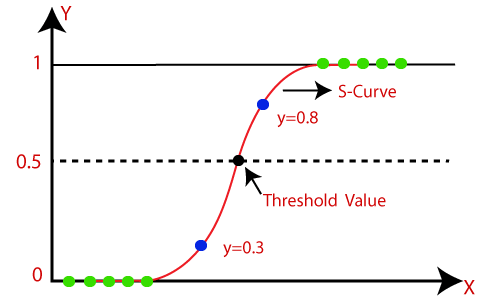

### Logistic regression uses the concept of predictive modeling as regression; therefore, it is called logistic regression, but is used to classify samples; Therefore, it falls under the classification algorithm.

### Logistic Function (Sigmoid Function):
The sigmoid function is a mathematical function used to map the predicted values to probabilities.

It maps any real value into another value within a range of 0 and 1.

The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.

In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.


**Assumptions for Logistic Regression:**

The dependent variable must be categorical in nature.

The independent variable should not have multi-collinearity.

### Logistic Regression Equation:
The Logistic regression equation can be obtained from the Linear Regression equation. The mathematical steps to get Logistic Regression equations are given below:

We know the equation of the straight line can be written as:
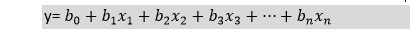

Logistic Regression in Machine Learning
In Logistic Regression y can be between 0 and 1 only, so for this let's divide the above equation by (1-y):
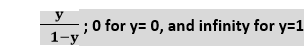

Logistic Regression in Machine Learning
But we need range between -[infinity] to +[infinity], then take logarithm of the equation it will become:
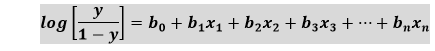

Logistic Regression in Machine Learning

### Type of Logistic Regression:
On the basis of the categories, Logistic Regression can be classified into three types:

Binomial: In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.

Multinomial: In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"

Ordinal: In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Predict survival on the Titanic ship
### Given a passenger data , can we predict if he can survive or not

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [4]:
train.sample(n=500)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.shape

(891, 12)

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

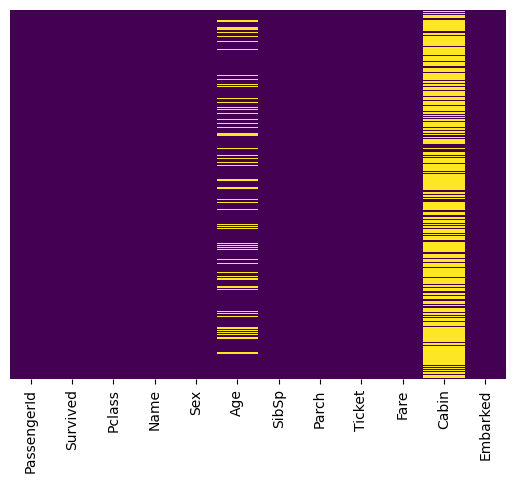

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
percent_missing=train.isnull().sum()*100/len(train)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [27]:
missing_perct_df=pd.DataFrame({"col_name":train.columns,"% missing":percent_missing})
# missing_perct_df.head(11)
missing_perct_df.sort_values(by="% missing",ascending=False)

,col_name,% missing
Cabin,Cabin,77.104377
Age,Age,19.865320
Embarked,Embarked,0.224467
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<Axes: xlabel='Survived', ylabel='count'>

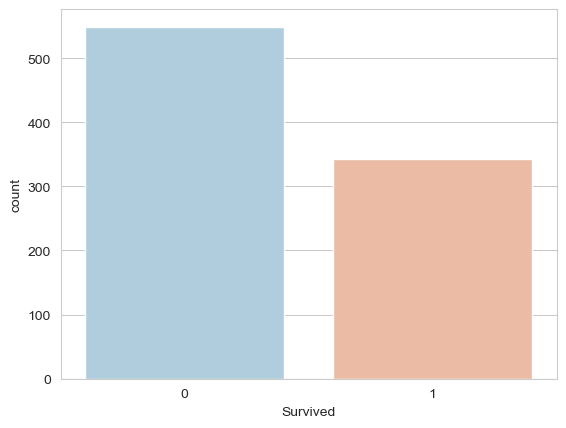

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

In [30]:
# Above plot says that nonsurvied is more than survive
# univarate - analysis of 1 column
# bivate - anaylyss of 2 colums


<AxesSubplot:xlabel='Survived', ylabel='count'>

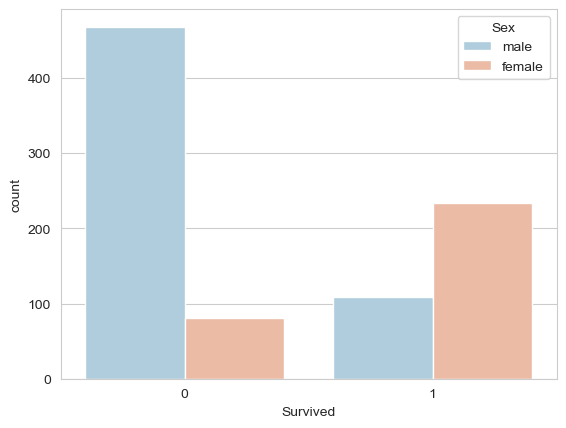

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [32]:
#Insght: as wen can see female tends to survive more than males.
    

<AxesSubplot:xlabel='Survived', ylabel='count'>

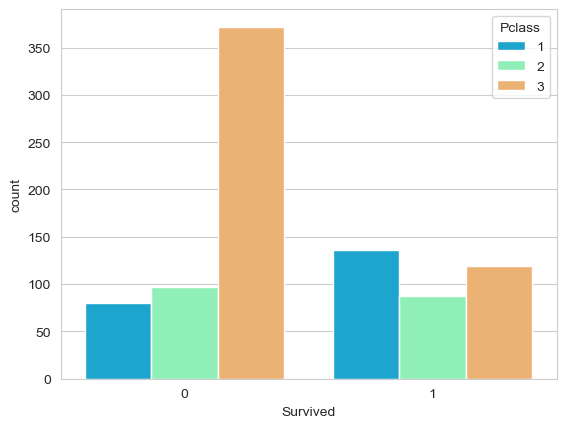

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:xlabel='Age', ylabel='Density'>

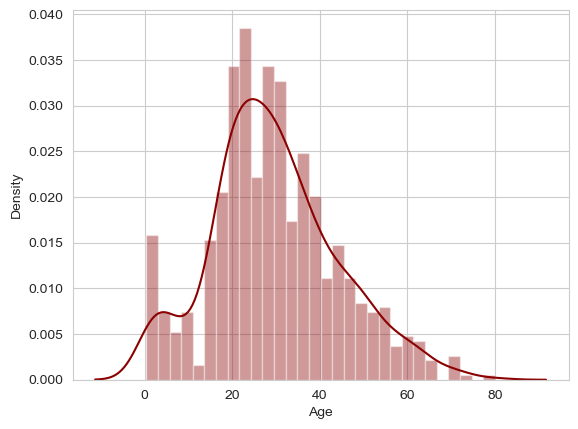

In [34]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=30)

<AxesSubplot:>

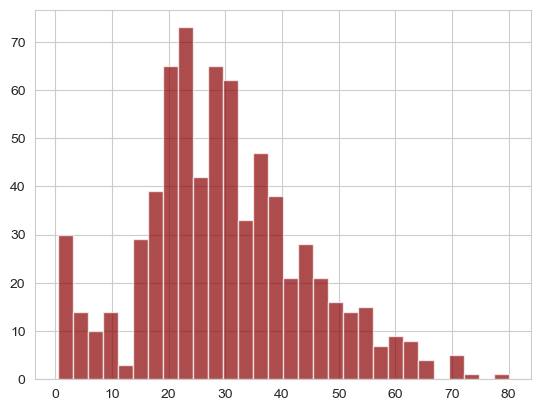

In [35]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

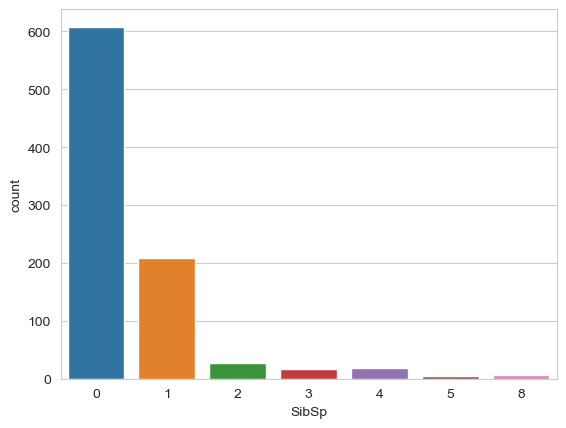

In [36]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

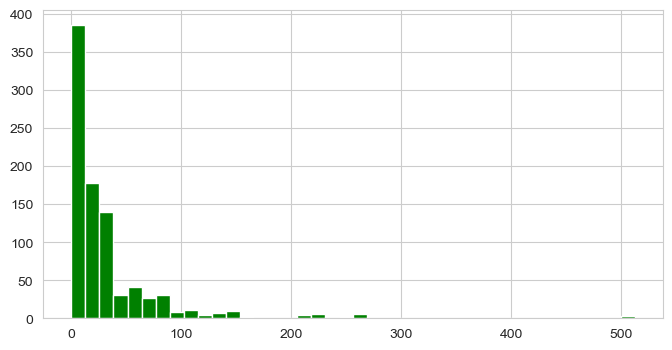

In [37]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

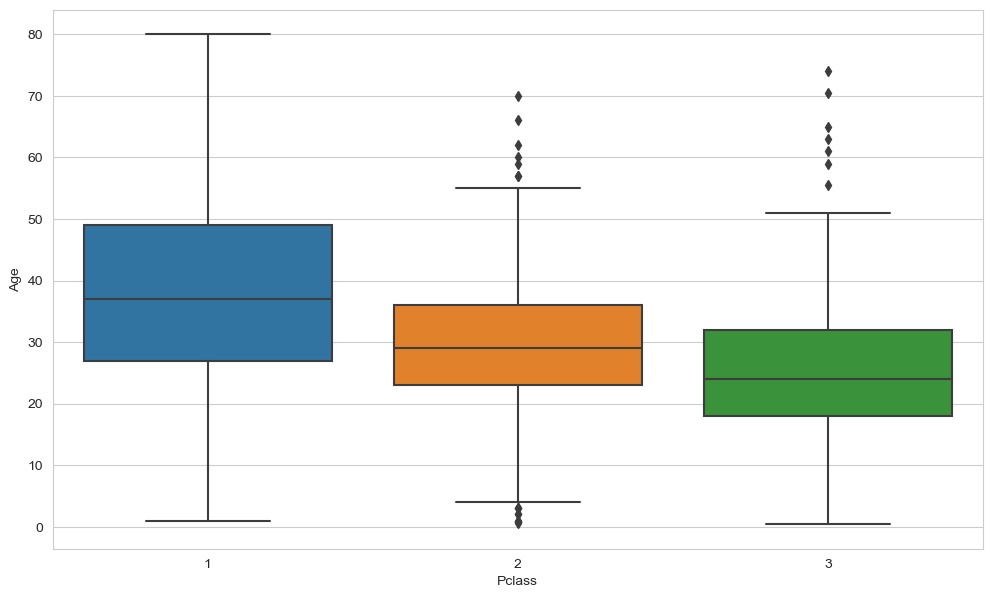

In [38]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='tab10')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now let's check that heat map again!

<Axes: >

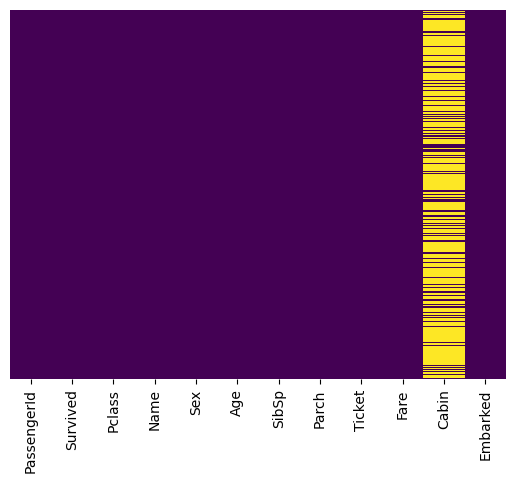

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
train["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [19]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
sex = pd.get_dummies(train['Sex'],drop_first=True,dtype=int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [21]:
embark = pd.get_dummies(train['Embarked'],drop_first=True,dtype=int)

In [22]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [21]:
train.head(11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [22]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [24]:
# train = pd.concat([train,sex,embark],axis=1)

NameError: name 'embark' is not defined

In [27]:
train.head(11)


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,24.0,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


In [28]:
train.shape

(889, 9)

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train.shape

(889, 6)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                         train['Survived'], test_size=0.30, 
                                                    random_state=76)

In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [32]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare
658,2,23.0,0,0,13.0000
404,3,20.0,0,0,8.6625
764,3,16.0,0,0,7.7750
298,1,37.0,0,0,30.5000
613,3,24.0,0,0,7.7500


In [33]:
X_train.shape

(622, 5)

In [34]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare
658,2,23.0,0,0,13.0000
404,3,20.0,0,0,8.6625
764,3,16.0,0,0,7.7750
298,1,37.0,0,0,30.5000
613,3,24.0,0,0,7.7500


In [83]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
658,2,23.0,0,0,13.0000,1,0,1
404,3,20.0,0,0,8.6625,0,0,1
764,3,16.0,0,0,7.7750,1,0,1
298,1,37.0,0,0,30.5000,1,0,1
613,3,24.0,0,0,7.7500,1,1,0


In [39]:
y_test.head()

662    0
17     1
263    0
736    0
534    0
Name: Survived, dtype: int64

## Training and Predicting

In [36]:
# 1.import the model from sklearn
from sklearn.linear_model import LogisticRegression

# 2.Initilize
logmodel = LogisticRegression()

# 3.train
logmodel.fit(X_train,y_train)


# 4.predict
predictions = logmodel.predict(X_test)

In [37]:
predictions[:5]

array([1, 0, 1, 0, 0])

In [38]:
predictions_prob = logmodel.predict_proba(X_test)
predictions_prob

array([[0.49723448, 0.50276552],
       [0.55537359, 0.44462641],
       [0.47118556, 0.52881444],
       [0.78174298, 0.21825702],
       [0.76153899, 0.23846101],
       [0.60419485, 0.39580515],
       [0.78927046, 0.21072954],
       [0.6682467 , 0.3317533 ],
       [0.85501369, 0.14498631],
       [0.86303613, 0.13696387],
       [0.64467711, 0.35532289],
       [0.75408827, 0.24591173],
       [0.669703  , 0.330297  ],
       [0.65102387, 0.34897613],
       [0.63861212, 0.36138788],
       [0.57738924, 0.42261076],
       [0.02084885, 0.97915115],
       [0.52191748, 0.47808252],
       [0.27638526, 0.72361474],
       [0.36144792, 0.63855208],
       [0.52474517, 0.47525483],
       [0.42042392, 0.57957608],
       [0.73223051, 0.26776949],
       [0.71503606, 0.28496394],
       [0.69288454, 0.30711546],
       [0.6909015 , 0.3090985 ],
       [0.62150886, 0.37849114],
       [0.72521548, 0.27478452],
       [0.58155173, 0.41844827],
       [0.71720879, 0.28279121],
       [0.

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [40]:
results = confusion_matrix(y_test, predictions) 

results

array([[156,  25],
       [ 43,  43]])

In [41]:
accuracy_score(y_test, predictions)

0.7453183520599251

In [43]:
y_test[:10]

662    0
17     1
263    0
736    0
534    0
576    1
485    0
541    0
129    0
873    0
Name: Survived, dtype: int64

In [44]:
predictions[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       181
           1       0.70      0.76      0.73        86

    accuracy                           0.82       267
   macro avg       0.79      0.80      0.79       267
weighted avg       0.82      0.82      0.82       267



In [45]:
from sklearn .metrics import roc_auc_score


auc = np.round(roc_auc_score(y_test, predictions), 3)

print("Auc for our sample data is {}". format(auc))


Auc for our sample data is 0.681


In [49]:
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions, pos_label=1)
thresh1

array([inf,  1.,  0.])

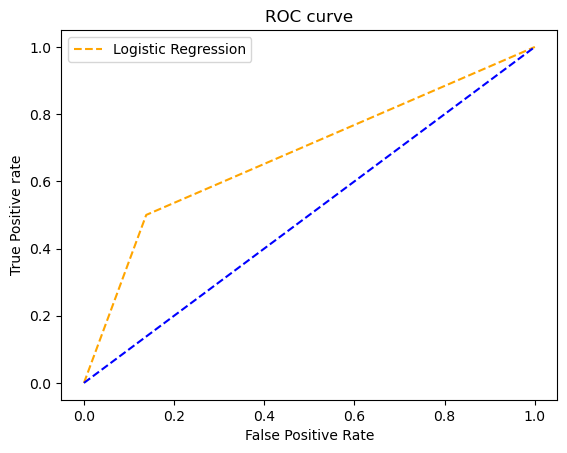

In [47]:
from sklearn.metrics import roc_curve

# matplotlib
import matplotlib.pyplot as plt
# plt.style.use('seaborn')
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predictions, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!

## Is logistic regression only for binary classification?


The output that is given by a Logistic Regression unit is in the range 0 to 1.

We can think of the output to be the probability that it belongs to the positive class. 

So if output is higher than 0.5, then the example belongs to the positive class else it belongs
to the negative class.

So a single logistic regression unit only supports binary classification.

**To extend logistic regression to multiple classes there are mainly two methods:**

One vs All

One vs One




#### One vs all:

Suppose we have 4 classes. We train 4 independent logistic regression units one for each class as positive and other examples as negative.

Thus

For first model, positive class- 1, negative class-(2,3,4)

For second model, positive class-2, negative class-(1,3,4)

For third model, positive class-3, negative class-(1,2,4)

For Fourth model, positive class-4,negative class-(1,2,3)

We then choose the class based on the probability of each of the models. 

Thus if first model has highest probability then example belongs to the first class.



In [ ]:
# 1.import the model from sklearn
from sklearn.linear_model import LogisticRegression

# 2.Initilize
logmodel = LogisticRegression(multi_class="ovr")

# 3.train
logmodel.fit(X_train,y_train)


# 4.predict
predictions = logmodel.predict(X_test)

#### One vs One

In this method, we train a model for each pair of classes

So for 4 classes, we train 6 models

1)Positive class-1, negative class-2

2)Positive class-1, negative class-3

3)Positive class-1, negative class-4

4)Positive class-2, negative class-3

5)Positive class-2, negative class-4

6)Positive class-3, negative class-4

Now we count how many models gave output as 1,2,3 and 4

The one with the maximum count might be the class of the example.

Usually we prefer One vs All over One vs One since less number of models are to be trained.

Also Logistic Regression units are the building blocks of a Neural Network , so a combination of these logisitic regression units support multi class classification.